## Import dependances

In [1]:
import phoebe as phb, numpy as np

import sys
sys.path.append('../')
from Functions.phoebeCustom import saveSimulation, normaliseFluxes

## Generate Binary

In [2]:
bSystem = phb.default_binary()

## Control Elements

These should stay the same as they shouldn't have any impact on the lightcurve.

In [3]:
period = 10
bSystem['period@binary'] = period
bSystem.add_dataset(
    'lc',
    times = phb.linspace(0, period, 1001),
    dataset = 'lc01',
    overwrite=True
)
# bSystem.add_dataset(
#     'rv',
#     times = phb.linspace(0, period, 1001),
#     dataset = 'rv01',
#     overwrite=True
# )

bSystem.flip_constraint('mass@primary', 'sma@binary')
bSystem['mass@primary@component'] = 1

## q Parameter Space

In [4]:
bSystem.flip_constraint('logg@secondary', 'requiv@secondary') # Flip constrain so radius of secondary changes with mass

<ConstraintParameter: {requiv@secondary@component} = sqrt((({mass@secondary@component} * 2942.206218) * 9.31954089506172778e+00) / (1.00000000000000000e+01 ** {logg@secondary@component})) (solar units) => 1.000000000084219 solRad>

In [24]:
bSystem['q@binary@component'] = 0.5

print(f'Primary mass: {bSystem['mass@primary@component'].get_value()} | \
      Secondary mass: {bSystem['mass@secondary@component'].get_value()} | \
          Mass ratio: {bSystem['q@binary@component'].get_value()} | \
      Primary radius: {bSystem['requiv@primary@component'].get_value()} | \
    Secondary radius: {bSystem['requiv@secondary@component'].get_value()}')

Primary mass: 1.0 |       Secondary mass: 0.49999999999999967 |           Mass ratio: 0.5 |       Primary radius: 1.0 |     Secondary radius: 0.7071067812460994


## Teff Parameter Space

In [5]:
bSystem['teff@secondary@component'] = 5800

print(f'Primary Teff: {bSystem['teff@primary@component'].get_value()} | \
      Secondary Teff: {bSystem['teff@secondary@component'].get_value()} | \
          Teff ratio: {bSystem['teffratio@binary@component'].get_value()}')

Primary Teff: 6000.0 |       Secondary Teff: 5800.0 |           Teff ratio: 0.9666666666666667


## Simulation and Plotting

In [14]:
bSystem.run_checks_compute()

<RunChecksReport 0 items: status=PASS>

In [4]:
bSystem.run_compute(model=f'q{str(bSystem['q@binary@component'].get_value()).replace('.','')}_teff{bSystem['teff@secondary@component'].get_value():.0f}', overwrite=True)

100%|██████████| 1001/1001 [00:06<00:00, 151.29it/s]


<ParameterSet: 3 parameters | qualifiers: times, comments, fluxes>

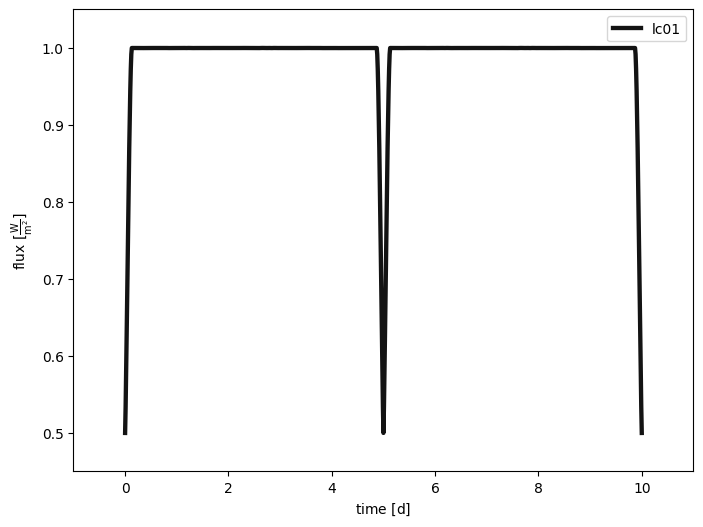

In [6]:
# bSystemNormal = normaliseFluxes(bSystem)
afig, mpltfig = bSystemNormal.plot(show=True, legend=True)

In [28]:
for model in bSystem.models:
    fluxes = bSystem[f'{model}@fluxes'].get_value()
    print(f'Range in flux: {np.ptp(fluxes[:100])}, Min flux: {np.min(fluxes)}')

Range in flux: 0.9986213647000706, Min flux: 0.9975978677671213
Range in flux: 0.9397867660283994, Min flux: 0.9565983916350387
Range in flux: 0.5811412069020352, Min flux: 0.916000087406327


## Save Simulation

In [ ]:
bSystem.models

In [13]:
from Functions.phoebeCustom import saveSimulation
saveSimulation(bSystem=bSystem, filename='testT')